<a href="https://colab.research.google.com/github/medhun/Crop-Yield-Prediction-using-ML/blob/master/Pneumonia_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### DATASET IMPORTING

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'18BCS102 (1).pdf'
'18BCS102 - Copy (1).docx'
'18BCS102 - Copy.docx'
 18BCS102-Dbs.pdf
 18BCS102.pdf
'18BCS102 Resume  (1).pdf'
 8912f_Operating_System_Concepts__8th_Edition_A4_.pdf
'Cognizant India Employee IP Agreement.PDF'
'Colab Notebooks'
'Document from M3D.pdf'
'Getting started.pdf'
'Medhun (1).pdf'
'Medhun (2).pdf'
'Medhun Chandrasekaran (1).pdf'
'Medhun Chandrasekaran.pdf'
 Medhun.pdf
 Screenshot_20210730_083612.jpg
'X ray'


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.preprocessing.image import img_to_array

In [ ]:
train_images = "/content/drive/MyDrive/X ray/X ray/train"


In [ ]:
train_dir='/content/drive/MyDrive/X ray/X ray/train'
test_dir='/content/drive/MyDrive/X ray/X ray/Test'
val_dir='/content/drive/MyDrive/X ray/X ray/validation'

In [ ]:
import os
os.listdir(train_dir)

['Normal', 'Pneumonia']

In [ ]:
train_n_path = train_dir+'/Normal/'
train_p_path = train_dir+'/Pneumonia/'

test_n_path = test_dir+'/Normal/'
test_p_path = test_dir+'/Pneumonia/'

In [ ]:
print(len(os.listdir(train_n_path))) #length of normal training images
print(len(os.listdir(train_p_path))) #length of pneumonia training images 
print('TOTAL TRAIN IMAGES:', len(os.listdir(train_n_path)) + len(os.listdir(train_p_path)))

450
329
TOTAL TRAIN IMAGES: 779


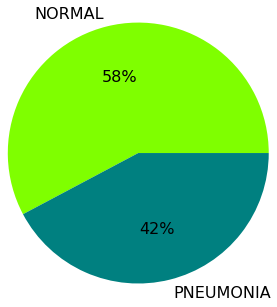

In [ ]:
x = np.array([len(os.listdir(train_n_path)),len(os.listdir(train_p_path))])
labels = ['NORMAL', 'PNEUMONIA']
colors = {'NORMAL': 'chartreuse','PNEUMONIA': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

### ANALSYIS USING PACKAGES

In [ ]:
from glob import glob #retriving an array of files in directories
import os
from PIL import Image

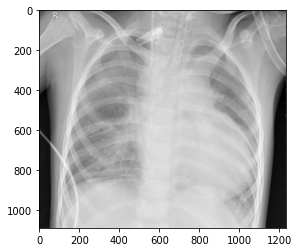

In [ ]:
img = glob(train_dir+"/Pneumonia/*.jpeg")
img = np.asarray(plt.imread(img[44]))
plt.imshow(img)


In [ ]:
img.shape #Checking the shape of this image. It seems like a three deminsional shape

(664, 968, 3)

(978, 1472, 3)

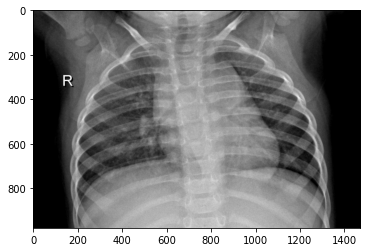

In [ ]:
img = glob(train_dir+"/Normal/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.imshow(img)
img.shape

In [ ]:
import cv2
train_dir='/content/drive/MyDrive/X ray/X ray/train'
test_dir='/content/drive/MyDrive/X ray/X ray/Test'
val_dir='/content/drive/MyDrive/X ray/X ray/validation'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


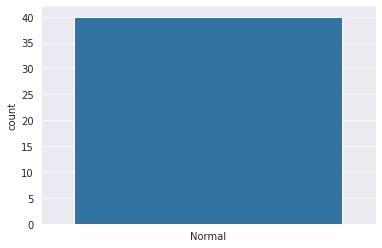

In [ ]:
import seaborn as sns
l = []
for i in train_dir:
    if(i[0] == 6):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  